### import libraries

In [1]:
import numpy as np  # type: ignore
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score


In [2]:
df = pd.read_csv("Data sets\Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


- Explorary Data Analysis :-
  - i will drop column (Unnamed: 0)
  - check null data 
  - check if there some duplicates
  - check if ther Outliers



In [3]:
df = df.drop(columns='Unnamed: 0')

In [4]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df = df.astype('float64')

In [8]:
df.round(1)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [9]:
df.TV.round(1)

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [10]:
fig1 = px.box(df , y=df['Newspaper'])
fig1.show()

In [11]:
# Removing Outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

fence_low = Q1 - 1.5 * IQR
fence_high = Q3 + 1.5 * IQR

df = df[~((df < fence_low) | (df > fence_high)).any(axis=1)]

df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [12]:
newfig = px.box(df , y=df['Newspaper'])
newfig.show()

In [13]:
fig2 = px.box(df , y=df['Radio'])
fig2.show()

In [14]:
fig2 = px.box(df , y=df['Sales'])
fig2.show()

In [15]:
df.duplicated().sum()

0

### conclusion 
- After Check the Correlation between Features, I FOUND :-
 - There's ONLY one 'strong' Relation Between [TV , Sales]
 - There Weak Correlation Between [Radio , Sales]


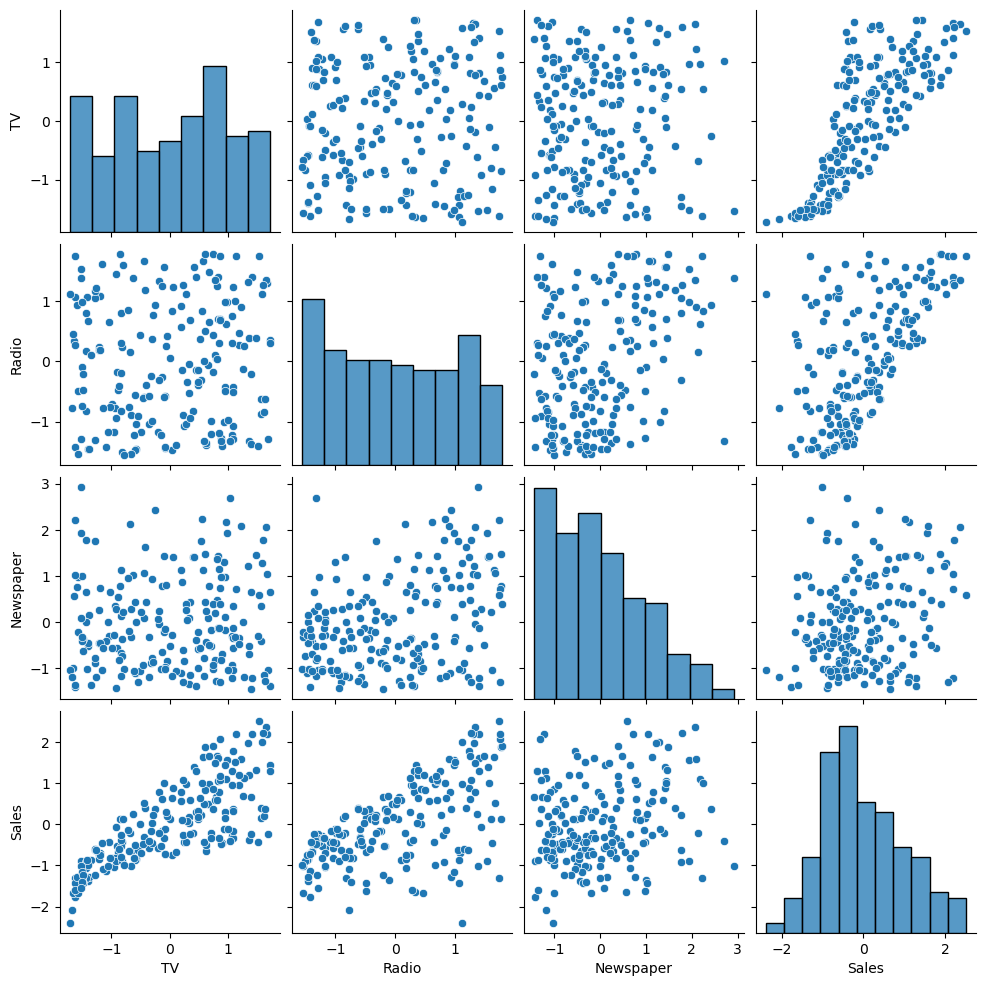

In [35]:
sns.pairplot(data=df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


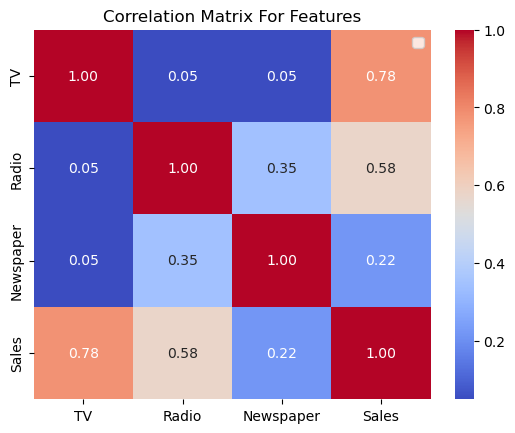

In [17]:
sns.heatmap(df.corr() , annot= True , cmap='coolwarm' , fmt= '.2f' )
plt.title("Correlation Matrix For Features")
plt.legend()
plt.show()

In [18]:
for a in df :
    standard_scaler = StandardScaler()
    df[a] = standard_scaler.fit_transform(df[[a]])

In [31]:
x = df.drop(columns='Sales')
x

,TV,Radio,Newspaper
0,0.978697,0.989521,1.932998
1,-1.199012,1.090705,0.751313
2,-1.519332,1.535913,1.937901
3,0.056456,1.225616,1.408349
4,0.400243,-0.831784,1.403446
...,...,...,...
195,-1.272932,-1.310720,-0.783407
196,-0.615864,-1.229773,-1.062892
197,0.355657,-0.932968,-1.146248
198,1.606431,1.272836,1.785900


In [32]:
y = df[['Sales']]
y.head()

,Sales
0,1.566517
1,-0.690881
2,-0.903115
3,0.871933
4,-0.208531


In [21]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.3 , random_state=7)

In [22]:
# Load Model 
rfr = RandomForestRegressor(random_state=7)

rfr.fit(x_train , y_train)
y_rfpred = rfr.predict(x_test)
y_rfpred_train = rfr.predict(x_train) 

In [23]:
rf_r2 = r2_score(y_test,y_rfpred)
print(f"Test",rf_r2)
rftrain_r2 = r2_score(y_train,y_rfpred_train)
print(f"Train",rftrain_r2)

Test 0.9741085296064718
Train 0.9965710701841539


In [24]:
param_grid = param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10 , 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rfr , param_grid=param_grid , cv= 5 , verbose=3)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.945 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.945 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.972 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.966 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.971 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.951 total time=   0.2s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.946 total time=   0.2s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.973 total time=   0.2s
[C

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=7),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [27]:
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_ # type: ignore
best_params

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [39]:
# Train a RandomForest Regressor with the best hyperparameters
best_rfr = RandomForestRegressor(random_state=7 , max_depth=20 , min_samples_leaf= 1 , n_estimators=300)
best_rfr.fit(x_train, y_train)

# Predict on the training and testing sets with the tuned model
y_train_pred = best_rfr.predict(x_train)
y_test_pred = best_rfr.predict(x_test)

# Calculate R2 score, MAE, and MSE for training and testing sets with the tuned model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Report the best hyperparameters and metrics
print(f"Best Hyperparameters:{best_params}")
print(f"Train R2 Score (Tuned Model): {train_r2:.3f}")
print(f"Test R2 Score (Tuned Model): {test_r2:.3f}")
print(f"Train MAE (Tuned Model):{train_mae:.3f}")
print(f"Test MAE (Tuned Model): {test_mae:.3f}")
print(f"Train MSE (Tuned Model): {train_mse:.3f}")
print(f"Test MSE (Tuned Model): {test_mse:.3f}")

Best Hyperparameters:{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Train R2 Score (Tuned Model): 0.996
Test R2 Score (Tuned Model): 0.975
Train MAE (Tuned Model):0.044
Test MAE (Tuned Model): 0.118
Train MSE (Tuned Model): 0.004
Test MSE (Tuned Model): 0.024


In [38]:
print(f"Train R2 Score (Tuned Model): {train_r2:.3f}")

Train R2 Score (Tuned Model): 0.996
